# 1D One-Group Diffusion — Critical Slab Reactor
This notebook solves the one-group neutron diffusion equation in a 1D slab geometry using the finite difference method. It calculates the fundamental mode and the effective multiplication factor $k_{eff}$.

The equation solved is:
$$ -D \nabla^2 \phi(x) + \Sigma_a \phi(x) = \frac{1}{k_{eff}} \nu \Sigma_f \phi(x) $$
with vacuum boundary conditions (zero flux at the boundaries).

In [15]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Reactor parameters
L = 365.76  # cm, WEC pin, active zone
N = 1000  # number of interior nodes
dx = L / (N + 1)

# Material properties
D = 1.5  # cm
Sigma_a = 0.03  # 1/cm
B2 = (np.pi / L)**2
nu_Sigma_f = Sigma_a + D * B2  # for k_eff = 1

In [17]:
# Finite difference coefficients (Dirichlet BC: phi(0)=phi(L)=0)
a = -D / dx**2
b = 2 * D / dx**2 + Sigma_a

#
A = np.zeros((N, N))
for i in range(N):
    A[i, i] = b
    if i > 0:
        A[i, i-1] = a
    if i < N - 1:
        A[i, i+1] = a

# Fission matrix for interior nodes
F = np.eye(N) * nu_Sigma_f
# Inverse of F
F_1 = np.eye(N) / nu_Sigma_f

In [18]:
# Solve A phi = (1/k) F phi
eigvals, eigvecs = np.linalg.eig(F_1 @ A)
idx = np.argmin(np.abs(eigvals))
keff = 1 / eigvals[idx]
phi = np.abs(eigvecs[:, idx])
phi /= np.max(phi)
print(f'Computed k_eff = {keff:.5f}')

Computed k_eff = 1.00000


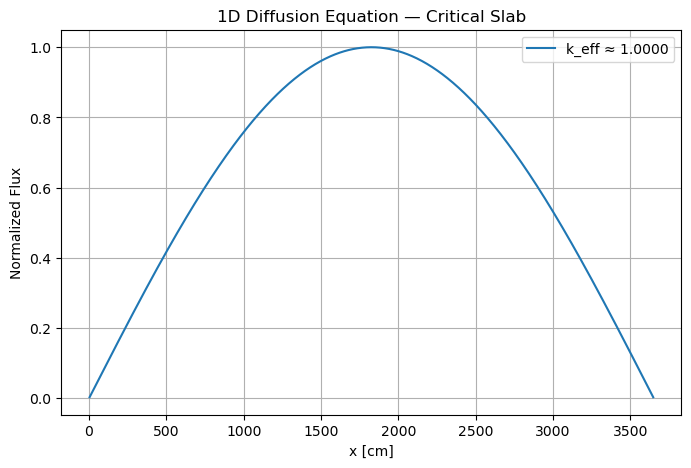

In [19]:
x = np.linspace(dx, L - dx, N)
plt.figure(figsize=(8, 5))
plt.plot(x, phi, label=f'k_eff ≈ {keff:.4f}')
plt.xlabel('x [cm]')
plt.ylabel('Normalized Flux')
plt.title('1D Diffusion Equation — Critical Slab')
plt.grid(True)
plt.legend()
plt.show()

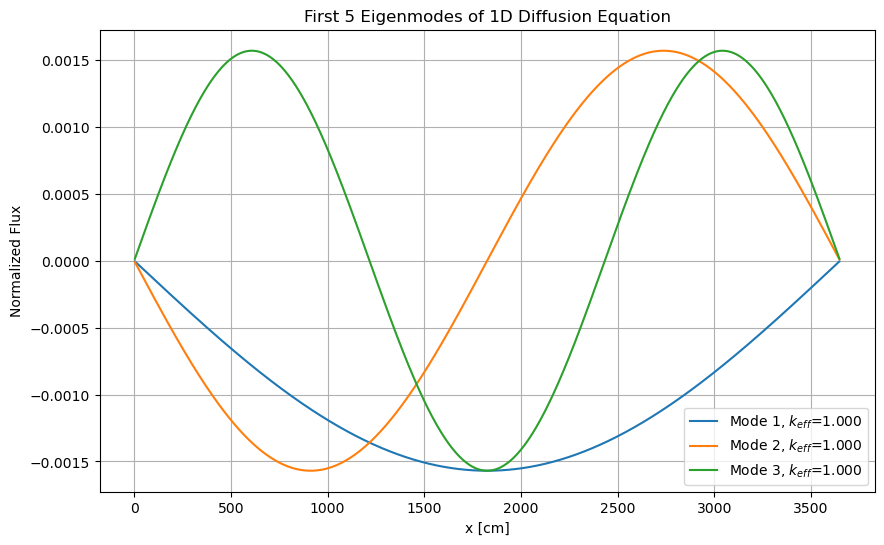

In [20]:
# Plot the first 3 eigenmodes
eigvals_all, eigvecs_all = np.linalg.eig(F_1 @ A)
# Sort eigenvalues and eigenvectors by eigenvalue magnitude
sorted_indices = np.argsort(np.abs(eigvals_all))
plt.figure(figsize=(10, 6))
for i in range(3):
    mode = (eigvecs_all[:, sorted_indices[i]])
    mode /= np.sum(np.abs(mode))
    plt.plot(x, mode, label=f'Mode {i+1}, $k_{{eff}}$={1/eigvals_all[sorted_indices[i]]:.3f}')
plt.xlabel('x [cm]')
plt.ylabel('Normalized Flux')
plt.title('First 5 Eigenmodes of 1D Diffusion Equation')
plt.legend()
plt.grid(True)
plt.show()

[1.         0.99988894 0.9997039  0.99944495 0.99911222 0.99870587
 0.99822606 0.99767302 0.997047   0.99634828 0.99557717 0.99473403
 0.99381922 0.99283316 0.99177628 0.99064906 0.98945198 0.98818558
 0.98685042 0.98544707 0.98397615 0.9824383  0.98083417 0.97916445
 0.97742987 0.97563114 0.97376904 0.97184434 0.96985785 0.96781038
 0.96570278 0.96353592 0.96131067 0.95902793 0.95668862 0.95429365
 0.95184399 0.94934057 0.94678438 0.94417639 0.94151761 0.93880902
 0.93605166 0.93324653 0.93039467 0.92749712 0.92455492 0.92156912
 0.91854076 0.91547091 0.91236063 0.90921098 0.90602302 0.90279781
 0.89953642 0.89623991 0.89290933 0.88954576 0.88615025 0.88272384
 0.87926759 0.87578253 0.87226972 0.86873017 0.86516492 0.86157498
 0.85796136 0.85432507 0.85066711 0.84698845 0.84329007 0.83957294
 0.83583802 0.83208625 0.82831857 0.82453589 0.82073914 0.8169292
 0.81310698 0.80927333 0.80542914 0.80157524 0.79771248 0.79384167
 0.78996364 0.78607917 0.78218904 0.77829404 0.77439491 0.77049

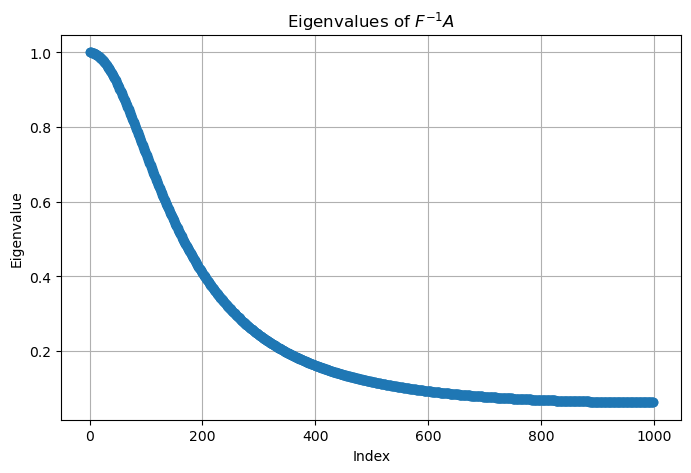

In [21]:
plt.figure(figsize=(8, 5))
print(1/eigvals_all[sorted_indices[:]])
plt.plot(np.arange(len(eigvals_all)), 1/eigvals_all[sorted_indices[:]], 'o')
plt.xlabel('Index')
plt.ylabel('Eigenvalue')
plt.title('Eigenvalues of $F^{-1}A$')
plt.grid(True)
plt.show()


